In [230]:
import pandas as pd
import numpy as np

In [231]:
FEATURES_FILE = 'data/NUSW-NB15_features.csv'
TRAIN_FILE = 'data/UNSW_NB15_training-set.csv'
TEST_FILE = 'data/UNSW_NB15_training-set.csv'

In [232]:
df_train = pd.read_csv(TRAIN_FILE)
df_test = pd.read_csv(TEST_FILE)
df_feature = pd.read_csv(FEATURES_FILE)

In [233]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [234]:
df_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
dur,0.000011,0.000008,0.000005,0.000006,0.00001,0.000003,0.000006,0.000028,0.0,0.0
proto,udp,udp,udp,udp,udp,udp,udp,udp,arp,arp
service,-,-,-,-,-,-,-,-,-,-
state,INT,INT,INT,INT,INT,INT,INT,INT,INT,INT
spkts,2,2,2,2,2,2,2,2,1,1
dpkts,0,0,0,0,0,0,0,0,0,0
sbytes,496,1762,1068,900,2126,784,1960,1384,46,46
dbytes,0,0,0,0,0,0,0,0,0,0
rate,90909.0902,125000.0003,200000.0051,166666.6608,100000.0025,333333.3215,166666.6608,35714.28522,0.0,0.0


In [235]:
df_train.shape

(82332, 45)

In [236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [237]:
df_feature

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [238]:
df_feature['name'] = ''
df_feature.name = df_feature.Name.str.lower()

In [239]:
dict = []
for n in df_test.columns:
    df1 = df_feature[df_feature.name == n]
    if df1.shape[0] == 0:
        dict.append([n, '---', '---'])
    else:
        dict.append([n, df1.iloc[0].Name, df1.iloc[0].Description])
df_dict = pd.DataFrame(dict, columns=['name', 'name1', 'description'])

In [240]:
df_dict

,name,name1,description
0,id,---,---
1,dur,dur,Record total duration
2,proto,proto,Transaction protocol
3,service,service,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ..."
4,state,state,Indicates to the state and its dependent proto...
5,spkts,Spkts,Source to destination packet count
6,dpkts,Dpkts,Destination to source packet count
7,sbytes,sbytes,Source to destination transaction bytes
8,dbytes,dbytes,Destination to source transaction bytes
9,rate,---,---


In [241]:
y = df_train.label
X = df_train.drop(columns=['id','label', 'attack_cat'])

In [242]:
from sklearn.preprocessing import OneHotEncoder

In [243]:
def oneh(df,features):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(X[features])
    def_oneh = pd.DataFrame(
        enc.transform(X_category).toarray(),
        columns=enc.get_feature_names_out())
    df = pd.concat([df, def_oneh], axis=1)
    return df.drop(columns=features)

In [244]:
X = oneh(X,['proto','service','state'])


In [245]:
X.shape[1]


190

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [248]:
from sklearn.ensemble import RandomForestClassifier

criterion: “entropy”, max_depth: None, max_features: 10, min_samples_leaf:
1, min_samples_split: 10, n_estimators: 100

In [249]:
clf = RandomForestClassifier(criterion='entropy', max_depth=None, max_features=10, min_samples_leaf=1,min_samples_split=10, n_estimators=100, random_state=42)

In [250]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=10, random_state=42)

In [251]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [252]:
prediction = clf.predict(X_test)

In [253]:
f1_score(y_test,prediction)

0.9767819121971003

In [261]:
cnf=confusion_matrix(y_test, prediction)

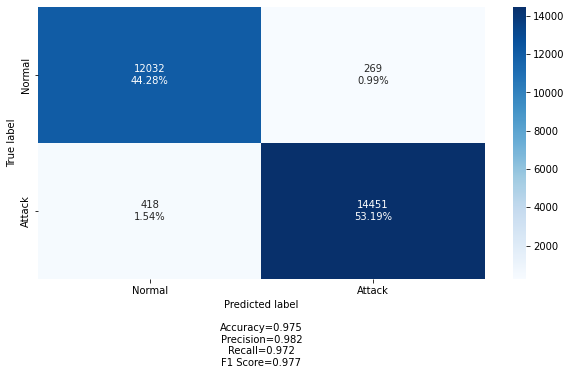

In [263]:
import cf_matrix
cf_matrix.make_confusion_matrix(cnf, figsize=(10,5), categories=['Normal', 'Attack'])

In [255]:
clf.score(X_train, y_train)

0.992458576556325

In [256]:
clf.score(X_test, y_test)

0.9747147589252853

In [258]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test), target_names=['Normal', 'Attack']))

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97     12301
      Attack       0.98      0.97      0.98     14869

    accuracy                           0.97     27170
   macro avg       0.97      0.98      0.97     27170
weighted avg       0.97      0.97      0.97     27170



In [203]:
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.023 seconds


In [204]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [220]:
X.columns[:50]

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_3pc', 'proto_a/n',
       'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris',
       'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna',
       'proto_br-sat-mon'],
      dtype='object')

In [221]:
importances[:50]

array([2.83395309e-02, 1.10038692e-02, 1.86340175e-02, 5.32281008e-02,
       3.27827238e-02, 4.30929743e-02, 6.26842985e-02, 2.73603852e-02,
       5.34455648e-02, 3.16570929e-02, 1.35092196e-02, 1.19256047e-02,
       2.12488409e-02, 2.12186498e-02, 1.53263942e-02, 1.23645246e-02,
       8.11187102e-03, 1.14397870e-02, 7.36303306e-03, 2.78485102e-03,
       2.72390429e-02, 3.21747696e-02, 2.47001396e-02, 4.97812994e-02,
       2.22883379e-02, 1.94324051e-03, 6.27881596e-03, 2.63337313e-02,
       3.09413797e-02, 1.47382098e-02, 1.29793586e-02, 4.37282982e-02,
       6.49740360e-02, 1.74922036e-04, 2.86988237e-04, 2.36147398e-03,
       1.20781175e-02, 3.28235539e-02, 3.52045827e-03, 2.34328177e-05,
       2.65121085e-06, 2.17459460e-06, 6.18608487e-05, 9.29900338e-06,
       1.18709115e-05, 2.27784693e-03, 5.94347134e-06, 4.49273201e-07,
       7.86997506e-06, 1.03562504e-05])

In [222]:
std

array([3.76181033e-02, 1.36410281e-02, 3.77288666e-02, 4.59232265e-02,
       5.32000289e-02, 6.31947235e-02, 9.64492685e-02, 4.83455236e-02,
       7.75441488e-02, 4.93550228e-02, 2.47850020e-02, 1.26199486e-02,
       2.59059319e-02, 2.93284717e-02, 2.04601391e-02, 1.13779359e-02,
       2.43033677e-02, 2.47511217e-02, 1.56095066e-02, 1.58083660e-02,
       3.65139347e-02, 4.33081387e-02, 4.03380443e-02, 3.98826162e-02,
       3.21637918e-02, 2.60847393e-03, 5.54665451e-03, 1.78217849e-02,
       5.90231479e-02, 1.52302972e-02, 2.32836960e-02, 6.51446015e-02,
       2.77627529e-02, 1.97452810e-04, 6.22277107e-04, 2.57241716e-03,
       1.18517196e-02, 2.43968224e-02, 9.06973721e-03, 8.65814979e-05,
       1.33421786e-05, 1.39864354e-05, 1.54153986e-04, 4.55027289e-05,
       4.94577240e-05, 6.56884482e-03, 3.15567093e-05, 4.05380407e-06,
       4.21267597e-05, 4.98138063e-05, 1.32605718e-04, 5.17534036e-05,
       3.86423497e-05, 3.94467716e-05, 4.04499864e-06, 3.36867367e-05,
      

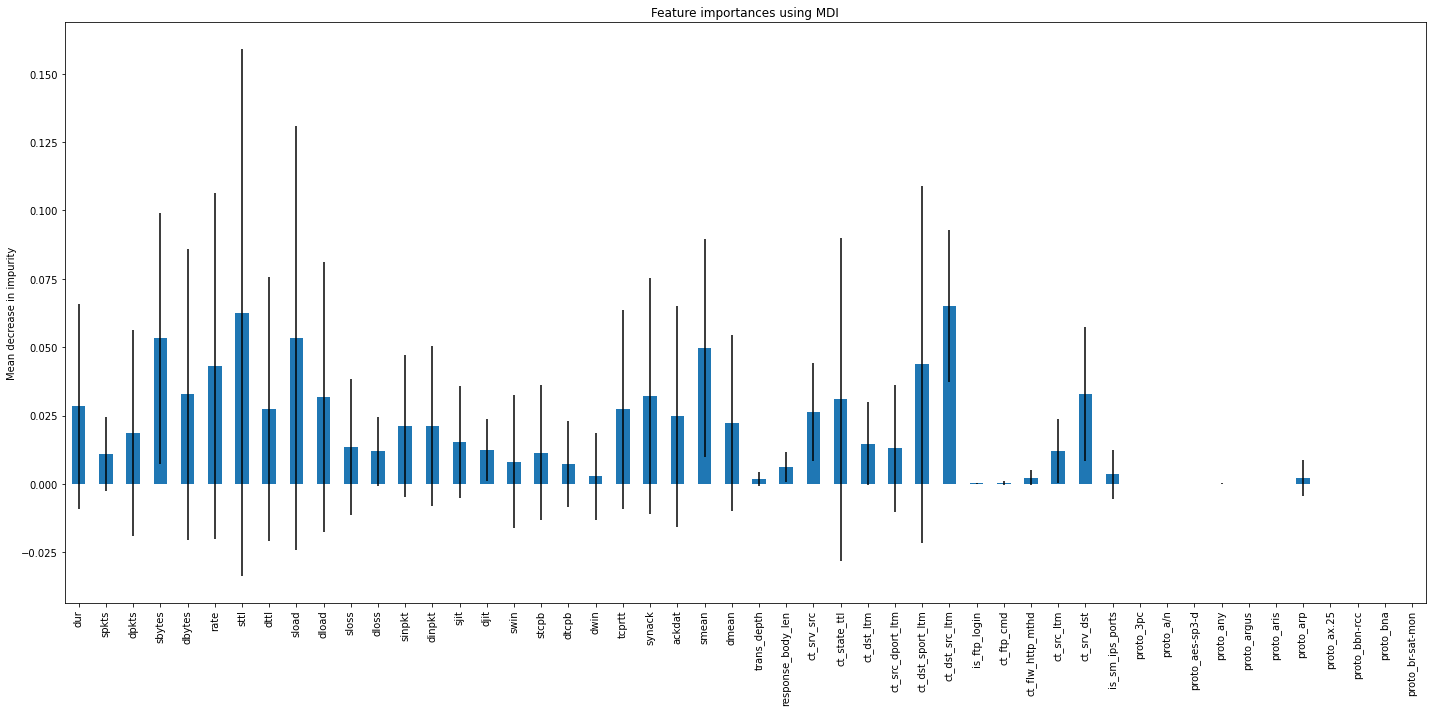

In [226]:
import pandas as pd
from matplotlib.pyplot import figure

forest_importances = pd.Series(importances[:50], index=X.columns[:50])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[:50], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(20,10)
fig.tight_layout()

Классификация


In [107]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [108]:
df_train.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [141]:
y = df_train.attack_cat
X = df_train.drop(columns=['id','label', 'attack_cat'])
X = oneh(X,['proto','service','state'])

In [142]:
X.shape

(82332, 190)

DecisionTree
criterion: «entropy», max_depth: None, max_leaf_nodes: 500, min_samples_leaf: 2, min_samples_split: 2


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [147]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_leaf_nodes=500, min_samples_leaf=2, min_samples_split=2, random_state=42)
cross_val_score(clf, X_train, y_train, cv=10)

array([0.87112561, 0.8754758 , 0.87617839, 0.87672226, 0.8740029 ,
       0.8740029 , 0.87744743, 0.87545323, 0.86910805, 0.86511965])

In [150]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=500,
                       min_samples_leaf=2, random_state=42)

In [171]:
y_train.head()

66237      Normal
22284     Generic
48620     Generic
9317     Exploits
21709     Generic
Name: attack_cat, dtype: object

In [159]:
clf.predict(X_train.iloc[3].array.reshape(1, -1))

C:\prj\Attack_detection\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Exploits'], dtype=object)

In [160]:
clf.score(X_train, y_train)

0.891592037997172

In [161]:
clf.score(X_test, y_test)

0.8738682370261318

In [165]:
conf=confusion_matrix(y_test, clf.predict(X_test))
conf

array([[   17,     0,    63,    32,   123,     0,     0,     0,     0,
            0],
       [    0,     6,    16,    42,   131,     0,     2,     1,     1,
            0],
       [    1,     1,   746,   332,   142,    20,    27,    13,    19,
            2],
       [    0,     3,   673,  2480,   292,    47,   107,    61,    17,
            7],
       [    0,     0,    94,   116,  1425,     1,   315,     2,     3,
            1],
       [    2,     1,    36,    79,    14,  6020,    12,     5,     4,
            4],
       [    0,     0,    14,    75,   151,     7, 12031,     5,    18,
            0],
       [    0,     3,   103,   105,    10,     0,    15,   930,     0,
            0],
       [    0,     0,     1,    12,     7,     2,    26,     3,    83,
            0],
       [    0,     0,     1,     3,     1,     0,     1,     0,     0,
            5]], dtype=int64)

In [164]:
import cf_matrix

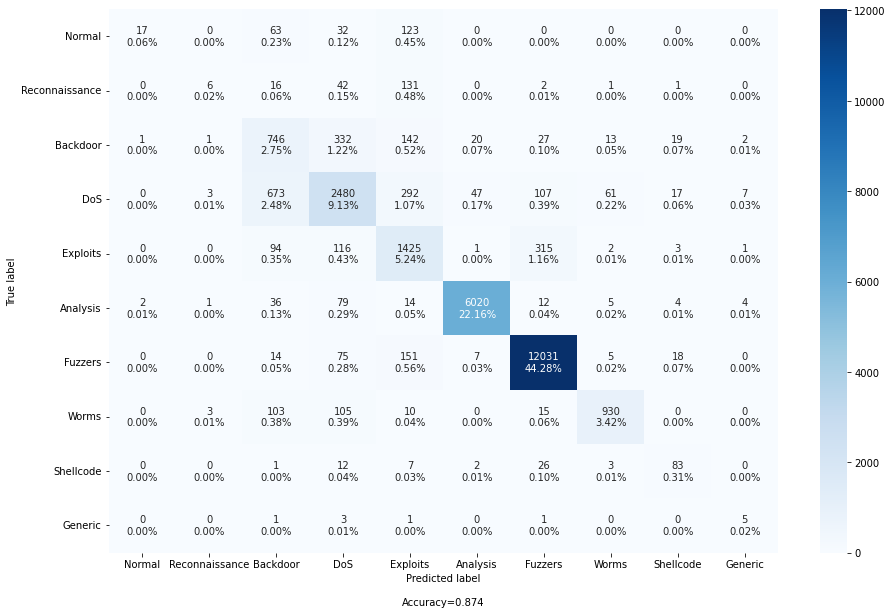

In [174]:
cat = df_train.attack_cat.unique()
cf_matrix.make_confusion_matrix(conf, figsize=(15,10), categories=cat)

In [176]:
from matplotlib import pyplot as plt
from sklearn import tree

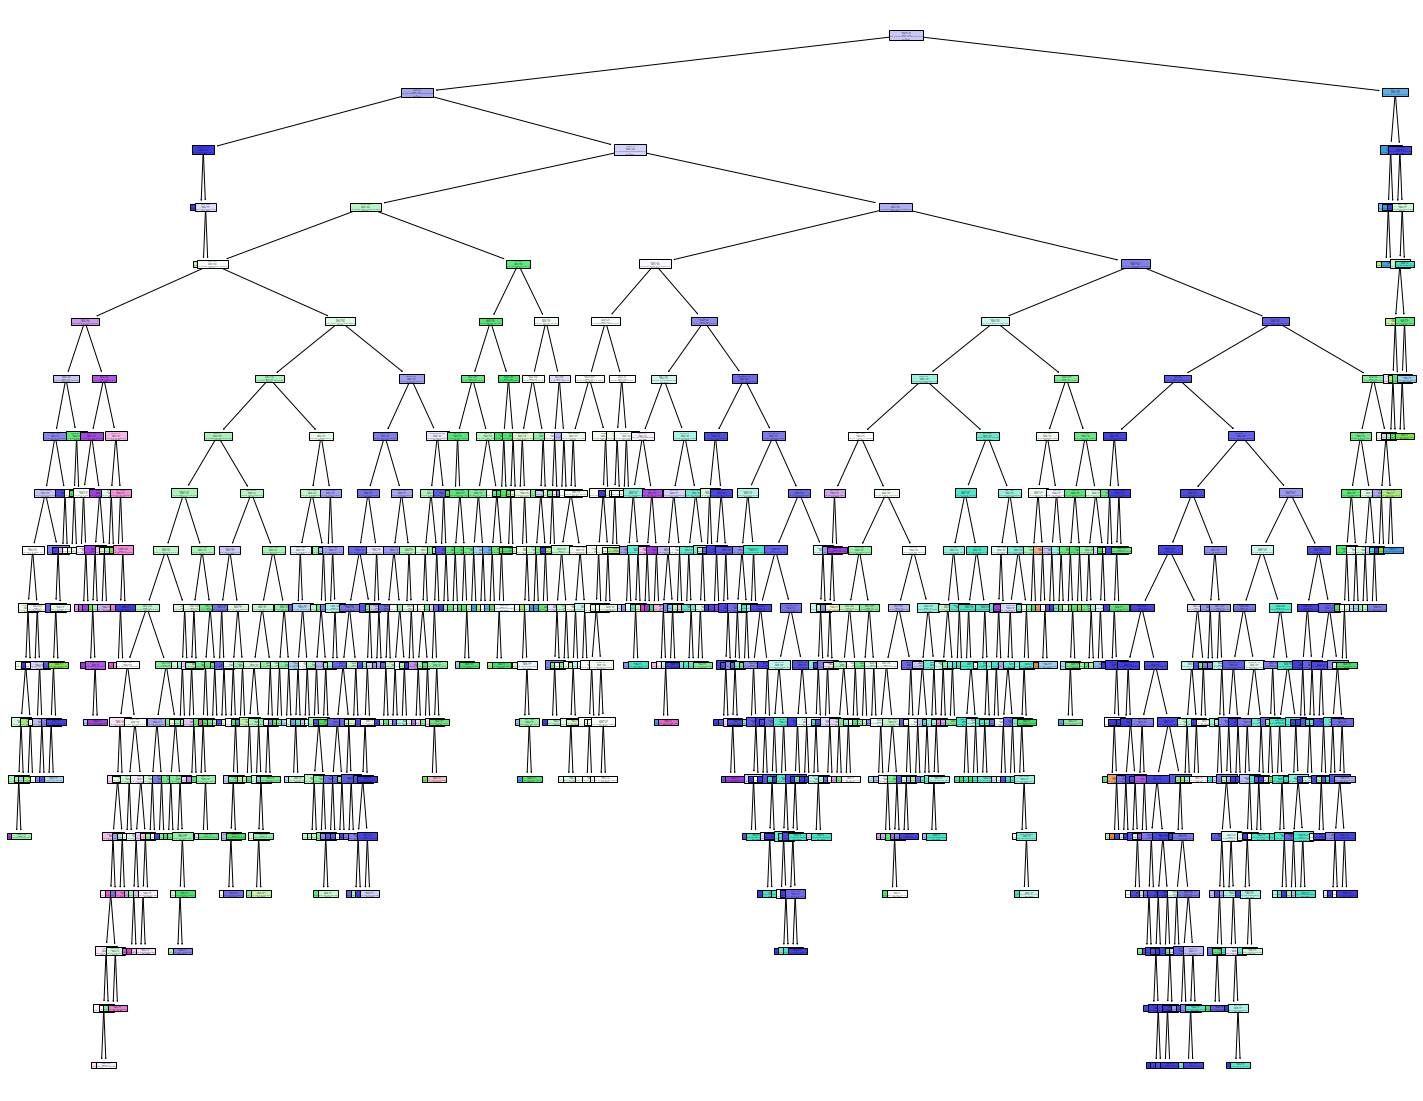

In [177]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=X_train.columns,
                   class_names=cat,
                   filled=True)

https://dyakonov.org/2018/04/25/%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5-bias-%D0%B8-%D1%80%D0%B0%D0%B7%D0%B1%D1%80%D0%BE%D1%81-variance-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82/